Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
import itertools
import statsmodels.api as sm
import seaborn as sns

Importing the Dataset

In [2]:
data=pd.read_excel("Crude Oil Prices Daily.xlsx")

In [3]:
data.head()

Date  Closing Value
0 1986-01-02          25.56
1 1986-01-03          26.00
2 1986-01-06          26.53
3 1986-01-07          25.85
4 1986-01-08          25.87

In [4]:
data.to_csv ("crude_oil_price_daily.csv", index = None, header=True)

In [5]:
df=pd.read_csv('crude_oil_price_daily.csv')

In [6]:
df.head()

Date  Closing Value
0  1986-01-02          25.56
1  1986-01-03          26.00
2  1986-01-06          26.53
3  1986-01-07          25.85
4  1986-01-08          25.87

Handling Missing Data

In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

Feature Scaling

In [11]:
oil_price=data.reset_index()['Closing Value']
oil_price

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
oil_price=scaler.fit_transform(np.array(oil_price).reshape(-1,1))

Data Visualisation

Text(0.5, 1.0, 'Price Trend over years')

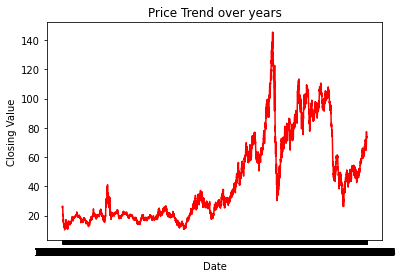

In [13]:
g = sns.lineplot(x='Date',y='Closing Value',data = df,color="red")
plt.title("Price Trend over years")

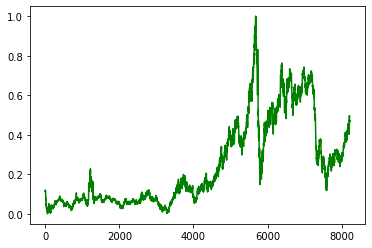

In [14]:
plt.plot(oil_price,color="green")

In [15]:
def price_plot_from_date_range(df, start_date, end_date):
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    sdf = df.loc[mask]
    plt.figure(figsize = (10,5))
    chart = sns.lineplot(x='Date',y='Closing Value',data = sdf)
    plt.title("Brent Oil Price Trend")

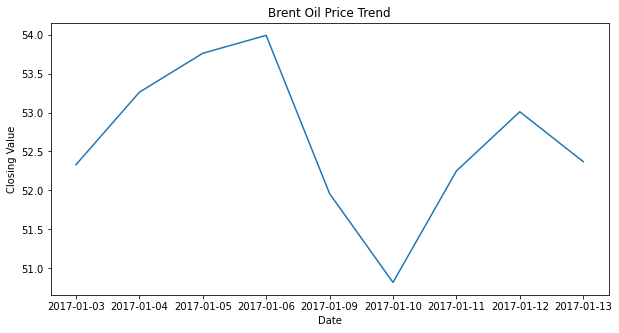

In [16]:
price_plot_from_date_range(df,'2017-01-01','2017-01-15')

Splitting Dataset into Train and Test

In [36]:
training_size=int(len(oil_price)*0.65)
test_size=len(oil_price)-training_size
train_data,test_data=oil_price[0:training_size,:],oil_price[training_size:len(oil_price),:1]

In [37]:
print("Training Data Size: ",training_size)
print("Test Data Size: ",test_size)

Training Data Size:  5340
Test Data Size:  2876


In [38]:
train_data.shape


(5340, 1)

In [39]:
test_data.shape

(2876, 1)

Creating Dataset With Sliding Windows

In [40]:
def Dataset_Creation(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [41]:
time_step=10
x_train,y_train=Dataset_Creation(train_data,time_step)
x_test,y_test=Dataset_Creation(test_data,time_step)

In [42]:
time_step=10
x_train,y_train=Dataset_Creation(train_data,time_step)
x_test,y_test=Dataset_Creation(test_data,time_step)

In [76]:
y_train.shape

(5329,)

In [43]:
print(x_test.shape)
print(y_test.shape)

(2865, 10)
(2865,)


In [46]:
x_train

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])

In [44]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# **Model Building**

In [77]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential